<a href="https://colab.research.google.com/github/BilalKhaliqWillis/BILAL-Assignment2/blob/main/BILAL_Assignment_4_Exploring_Clustering_with_DBSCAN_and_BIRCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Assignment 4: Exploring Clustering with DBSCAN and BIRCH
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, Birch
from sklearn.decomposition import PCA

In [2]:
# Loading the Iris Dataset
iris = load_iris()
X = iris.data
feature_names = iris.feature_names

df = pd.DataFrame(X, columns=feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
# Preprocessing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [4]:
# Dimensionality Reduction for Visualization (PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

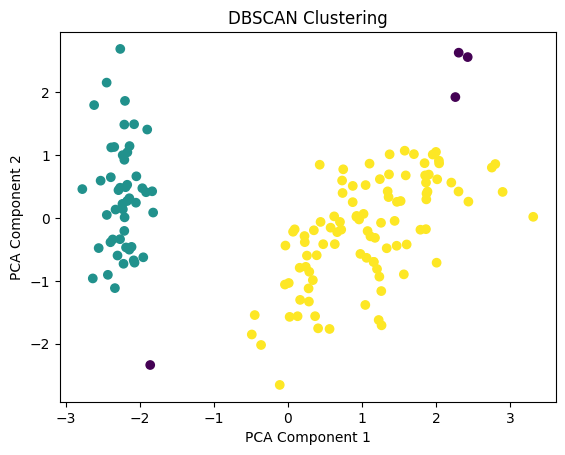

In [5]:
# Applying DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels)
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

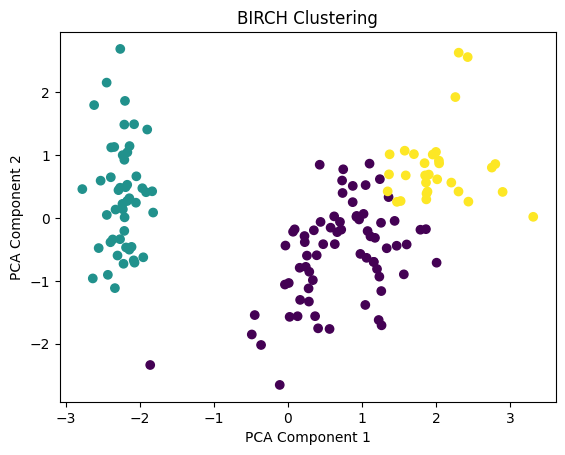

In [6]:
# Applying BIRCH
birch = Birch(n_clusters=3)
birch_labels = birch.fit_predict(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=birch_labels)
plt.title("BIRCH Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

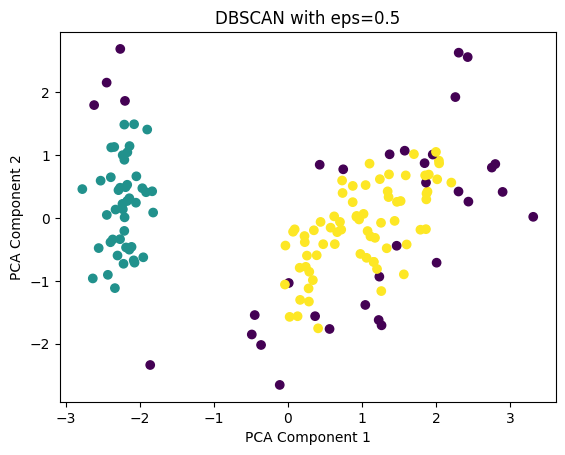

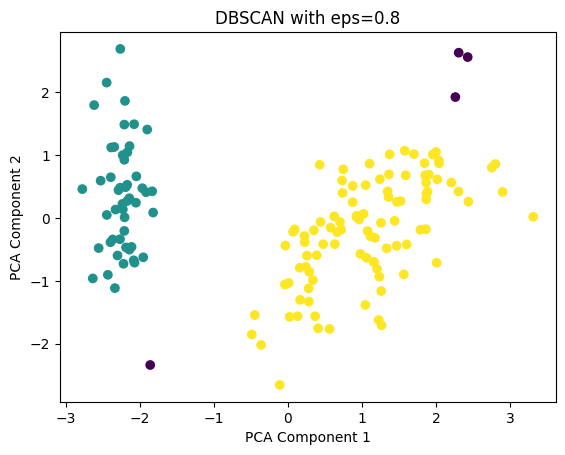

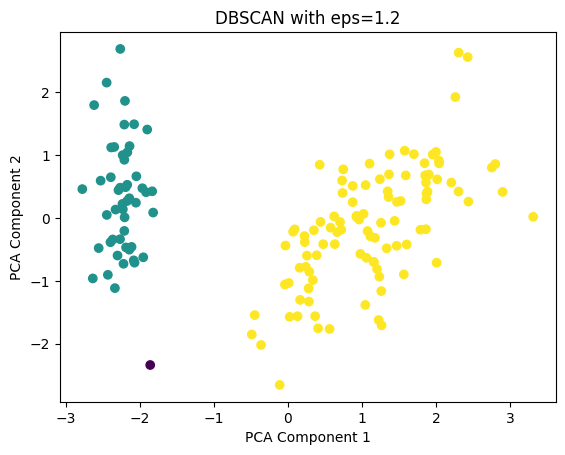

In [7]:
# Parameter Tuning – DBSCAN
eps_values = [0.5, 0.8, 1.2]

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)

    plt.figure()
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    plt.title(f"DBSCAN with eps={eps}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()

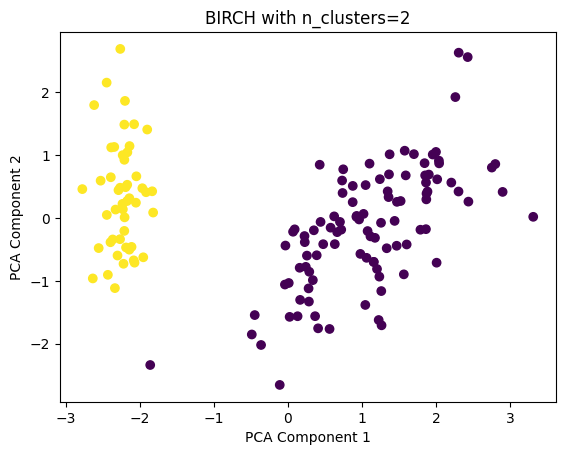

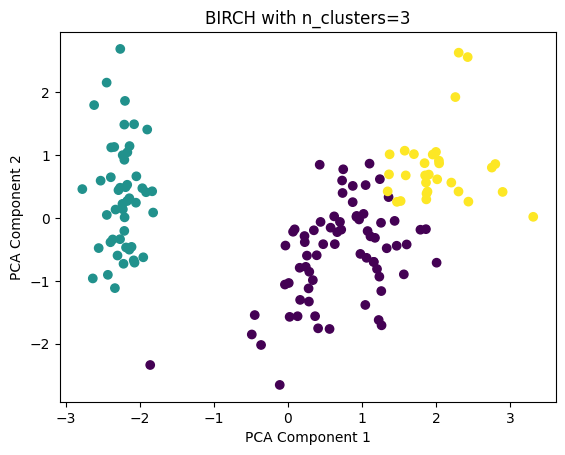

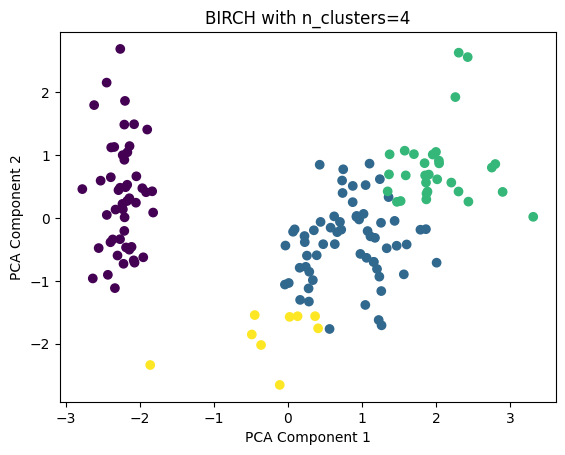

In [8]:
# Parameter Tuning – BIRCH
cluster_values = [2, 3, 4]

for k in cluster_values:
    birch = Birch(n_clusters=k)
    labels = birch.fit_predict(X_scaled)

    plt.figure()
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
    plt.title(f"BIRCH with n_clusters={k}")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()